In [89]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def pipeline(image_name):

    img = cv2.imread(image_name, cv2.CV_8UC1)
    #img = img[0:2250, 750:3000]
    width = 512
    height = 512
    dim = (width, height)

    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    blurred = cv2.medianBlur(resized,5)
    ret,thresholds = cv2.threshold(blurred, 0, 255, cv2.THRESH_OTSU)
    kernel = np.ones((5,5), np.uint8)
    mask = cv2.erode(thresholds, kernel, iterations=1)
    mask = cv2.dilate(mask, kernel, iterations=1)
    
    width = 64
    height = 64
    dim = (width, height)

    final = cv2.resize(mask, dim, interpolation = cv2.INTER_NEAREST)
    #final = cv2.bitwise_not(final)
    cv2.imwrite('edited_' + image_name, final)
    plt.imshow(final)
    plt.title('my picture')
    plt.show()

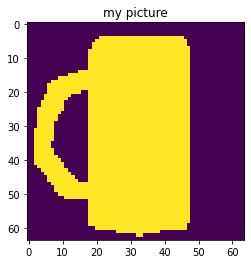

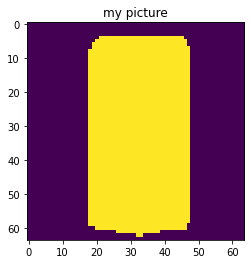

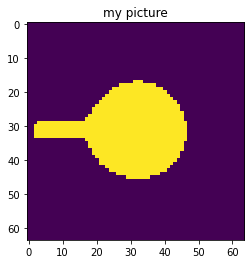

In [92]:
#pipeline('barrel1.jpg')
#pipeline('barrel2.jpg')
#pipeline('cup2.jpg')
pipeline('mug1.png')
pipeline('mug2.png')
pipeline('mug3.png')